# **Telcome Customer Churn**

we Build a model with **80%** Accurcy to detect Cutomer Churn based on Telcome Data:  
    \
***using***

**Data Cleanning**: <small>drop_duplicates & Fill Null Values.</small>
\
**EDA**: <small>Show Corrlelations between Futer's and Other To Know What's Futers we will use in building the model.</small>
\
**Futer Engineering**: <small>Create 2 Futers to Know outlairs.</small>
\
**Outlair**: <small>Face alot of outlairs and drop them to fiter data to make it more reabel</small>
\
**Build Model**: <small>Using 19 Futer as input to detect Target and split data to 80% train to 20% test.</small>
\
**model used**:<small> Logistic, Decision Tree, Naive Bayes using Gaussian, KNeighbors, Support Vector Machine, Ensemble methods using Boosting,Ensemble methods using Bagging.</small>
\
**Evaluting to model**: <small>Using Accuracy Score, Confusion Matrix & Classification report, and ROC.</small>

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Cleaning**

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We show that TotalCharges is Object we will change to numericl data
and show SeniorCitizen as integer we will change to Object.

In [309]:
df.drop('customerID',axis=1,inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = ((df['SeniorCitizen']).map({0:"No",1:"Yes"})).astype('object')

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [311]:
# Fill Null Values in TotalCharges with Mean of Column
meanV = df['TotalCharges'].mean()
df['TotalCharges']=df['TotalCharges'].fillna(meanV)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [313]:
df.duplicated().sum()

22

In [314]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

**EDA**

In [315]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000
mean,32.469449,64.851894,2290.342338
std,24.534965,30.069001,2265.044153
min,0.000000,18.250000,18.800000
25%,9.000000,35.750000,411.150000
50%,29.000000,70.400000,1410.250000
75%,55.000000,89.900000,3801.700000
max,72.000000,118.750000,8684.800000


In [316]:
df.describe(include='O')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3541,5880,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,5164


**EDA For Customer Information**

In [317]:
def countplot_ratio(data, x, hue=None, ax=None, rotate_xlabel=0):
    ax = sns.countplot(data=data, x=x, hue=hue, ax=ax)
    # Rotate x-axis labels based on the rotate_xlabel parameter
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
    ax.set_title(x + " Distributions")
    
    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2., height + 3,
                    '{:.2f}%'.format((height / total) * 100), 
                    fontsize=12, weight='bold', ha="center")

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

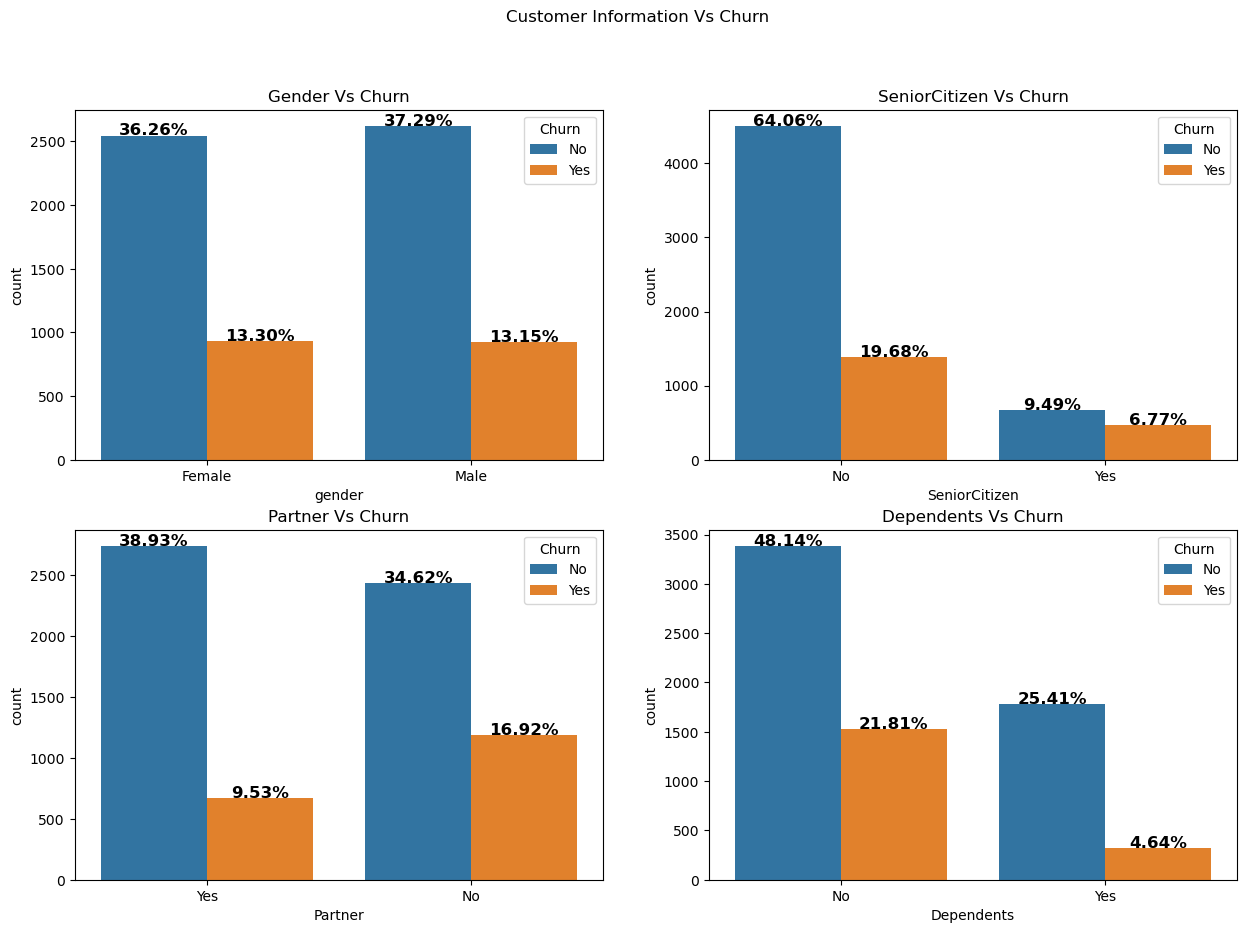

In [318]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.suptitle("Customer Information Vs Churn")

# Gender Plot.
countplot_ratio(data=df,x='gender',hue='Churn')
plt.title('Gender Vs Churn')

# SeniorCitizen Plot.
plt.subplot(2,2,2)
countplot_ratio(df,x='SeniorCitizen',hue='Churn')
plt.title('SeniorCitizen Vs Churn')

# Partner Plot.
plt.subplot(2,2,3)
countplot_ratio(df, x='Partner',hue='Churn')
plt.title('Partner Vs Churn')

# Dependent Plot.
plt.subplot(2,2,4)
countplot_ratio(df,x='Dependents',hue='Churn')
plt.title('Dependents Vs Churn')

plt.show()

In [319]:
def get_Pie(data, col):
    '''
    Creates pie chart that automatically adjusts to the number of categories
    '''
    values = data[col].value_counts()
    explode = [0.1] + [0]*(len(values)-1)
    colors = ['#FFD700', '#FFB6C1', '#87CEEB', '#98FB98', '#DDA0DD', '#FFA07A']
    
    plt.pie(
        values,
        labels=values.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(values)],
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'brown', 'linewidth': 2}
    )
    
    plt.title(f'{col} Cake Chart!', fontweight='bold')
    plt.gca().axis('equal')

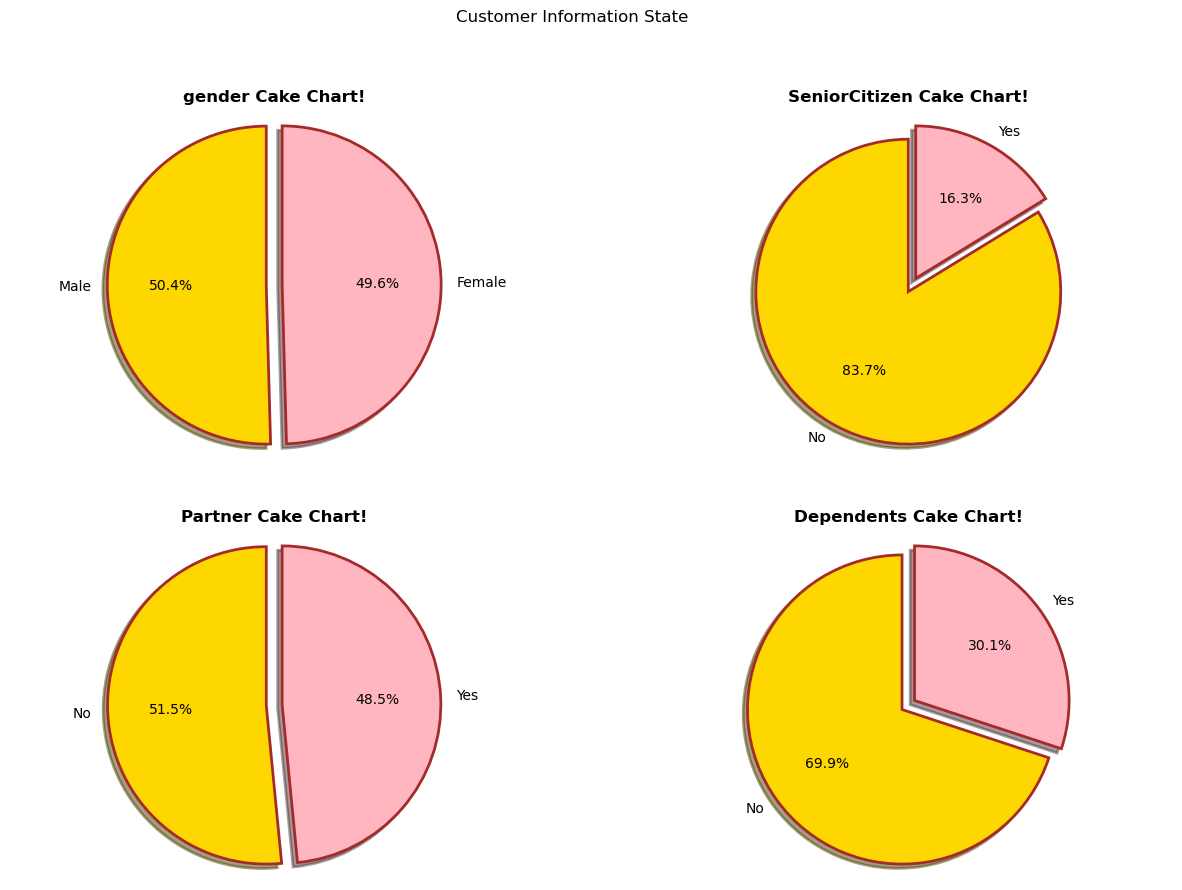

In [320]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.suptitle('Customer Information State')

# Gender State.
get_Pie(df,'gender')

#SeniorCitizen State.
plt.subplot(2,2,2)
get_Pie(df,'SeniorCitizen')

#Partner State.
plt.subplot(2,2,3)
get_Pie(df,'Partner')

#Dependents State.
plt.subplot(2,2,4)
get_Pie(df,'Dependents')

plt.show()  

**EDA For Services**

Main Services First:  

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


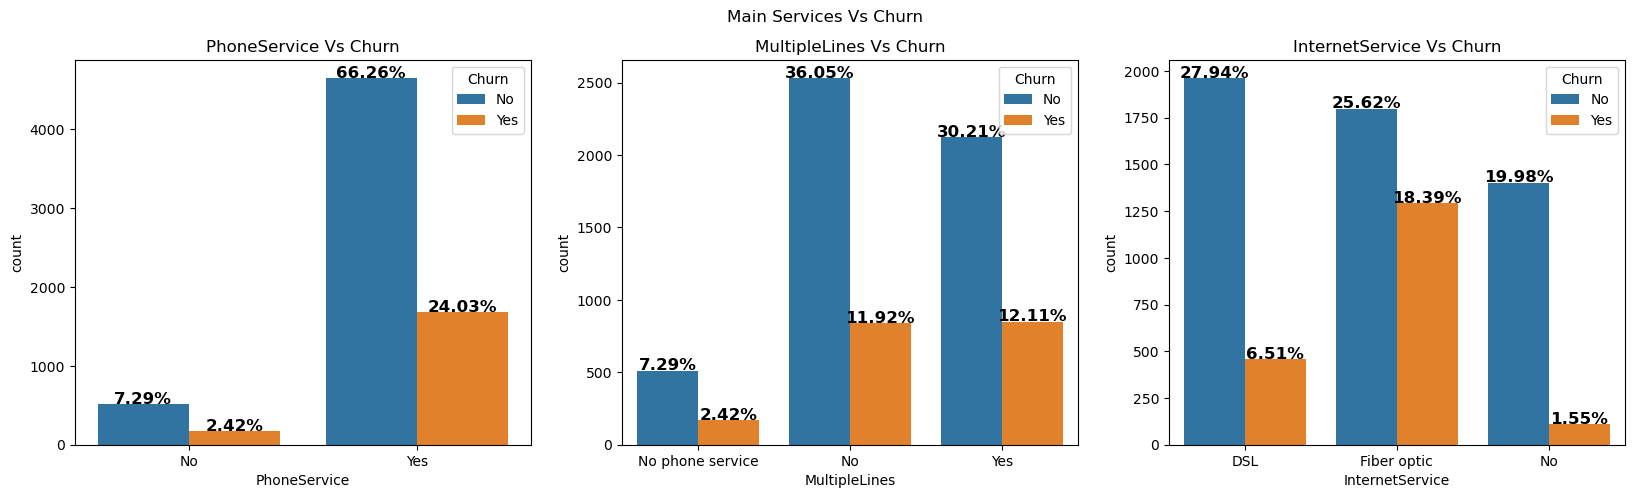

In [321]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.suptitle('Main Services Vs Churn')

# PhoneService Plot
countplot_ratio(df,x='PhoneService',hue='Churn')
plt.title('PhoneService Vs Churn')

# MultipleLines Plot
plt.subplot(1,3,2)
countplot_ratio(df,x='MultipleLines',hue='Churn')
plt.title('MultipleLines Vs Churn')

# InternetService Plot
plt.subplot(1,3,3)
countplot_ratio(df,x='InternetService',hue='Churn')
plt.title('InternetService Vs Churn')


plt.show()


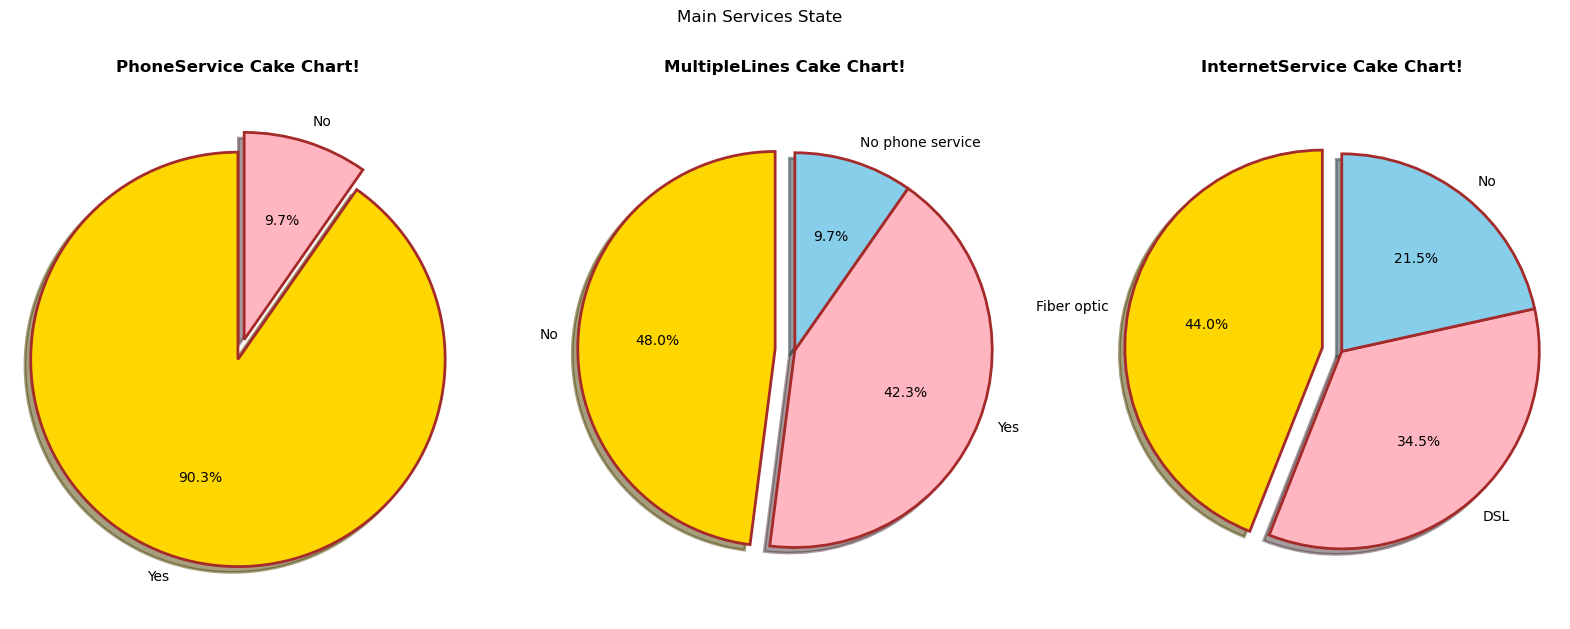

In [322]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.suptitle('Main Services State')

# PhoneService Plot
get_Pie(df,'PhoneService')

#MultipleLines State.
plt.subplot(1,3,2)
get_Pie(df,'MultipleLines')

#InternetService State.
plt.subplot(1,3,3)
get_Pie(df,'InternetService')

plt.show()

Secondry Services

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

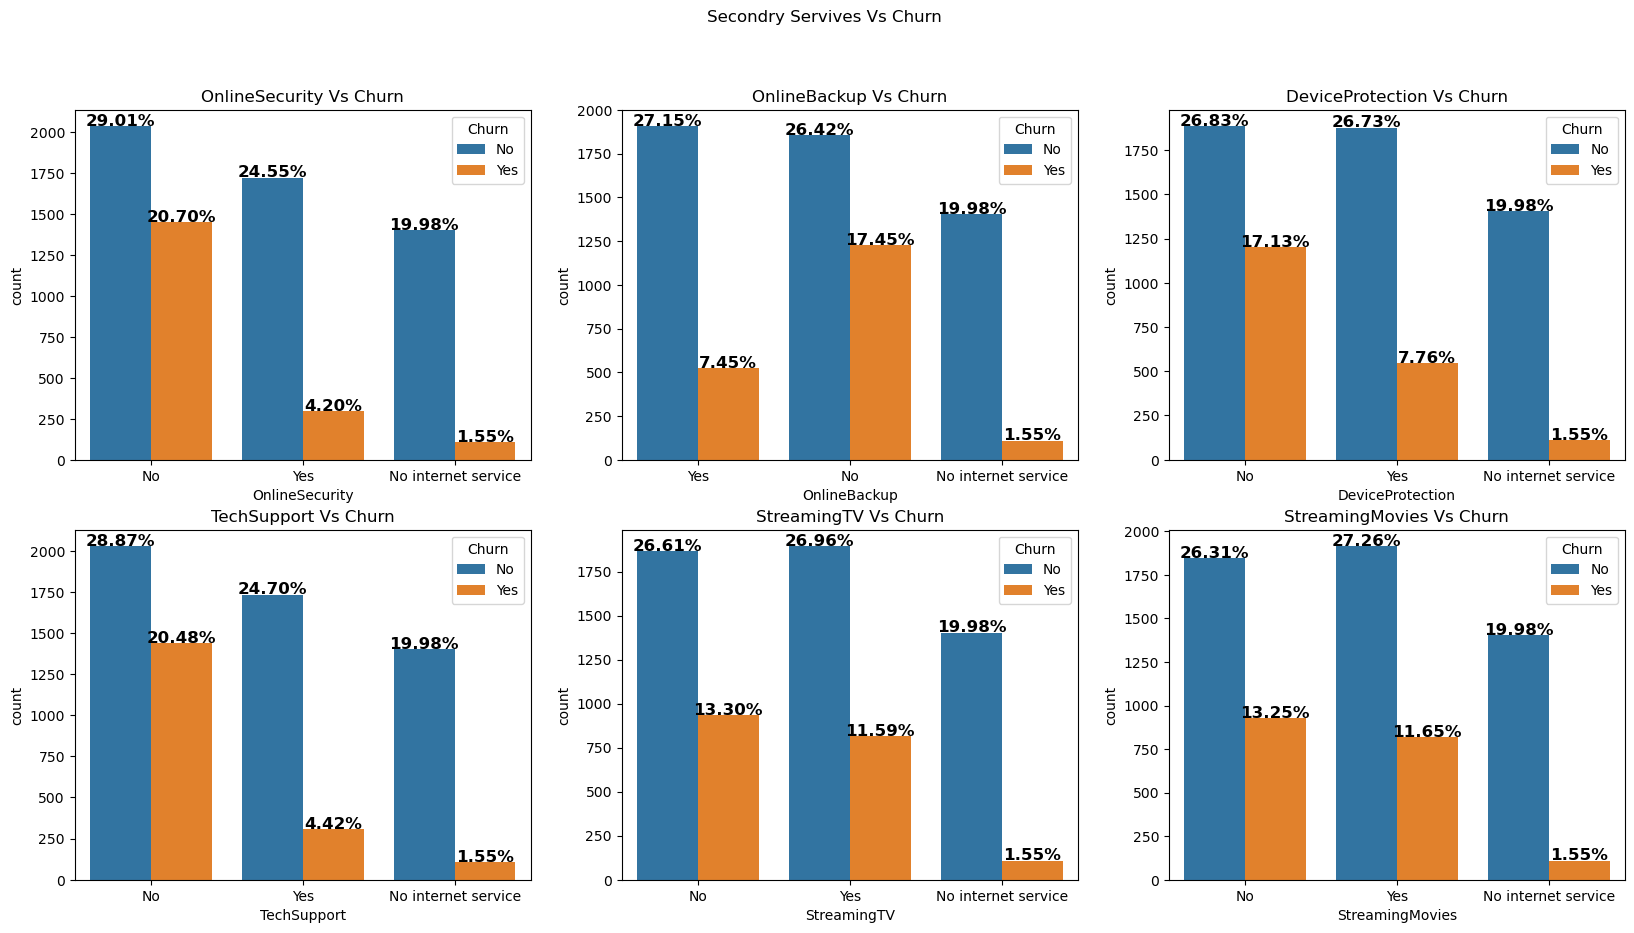

In [323]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.suptitle("Secondry Servives Vs Churn")

# OnlineSecurity Plot
plt.subplot(2,3,1)
countplot_ratio(df,x='OnlineSecurity',hue='Churn')
plt.title('OnlineSecurity Vs Churn')

# OnlineBackup Plot
plt.subplot(2,3,2)
countplot_ratio(df,x='OnlineBackup',hue='Churn')
plt.title('OnlineBackup Vs Churn')

# DeviceProtection Plot
plt.subplot(2,3,3)
countplot_ratio(df,x='DeviceProtection',hue='Churn')
plt.title('DeviceProtection Vs Churn')

# TechSupport Plot
plt.subplot(2,3,4)
countplot_ratio(df,x='TechSupport',hue='Churn')
plt.title('TechSupport Vs Churn')

# StreamingTV Plot
plt.subplot(2,3,5)
countplot_ratio(df,x='StreamingTV',hue='Churn')
plt.title('StreamingTV Vs Churn')

# StreamingMovies Plot
plt.subplot(2,3,6)
countplot_ratio(df,x='StreamingMovies',hue='Churn')
plt.title('StreamingMovies Vs Churn')

plt.show()

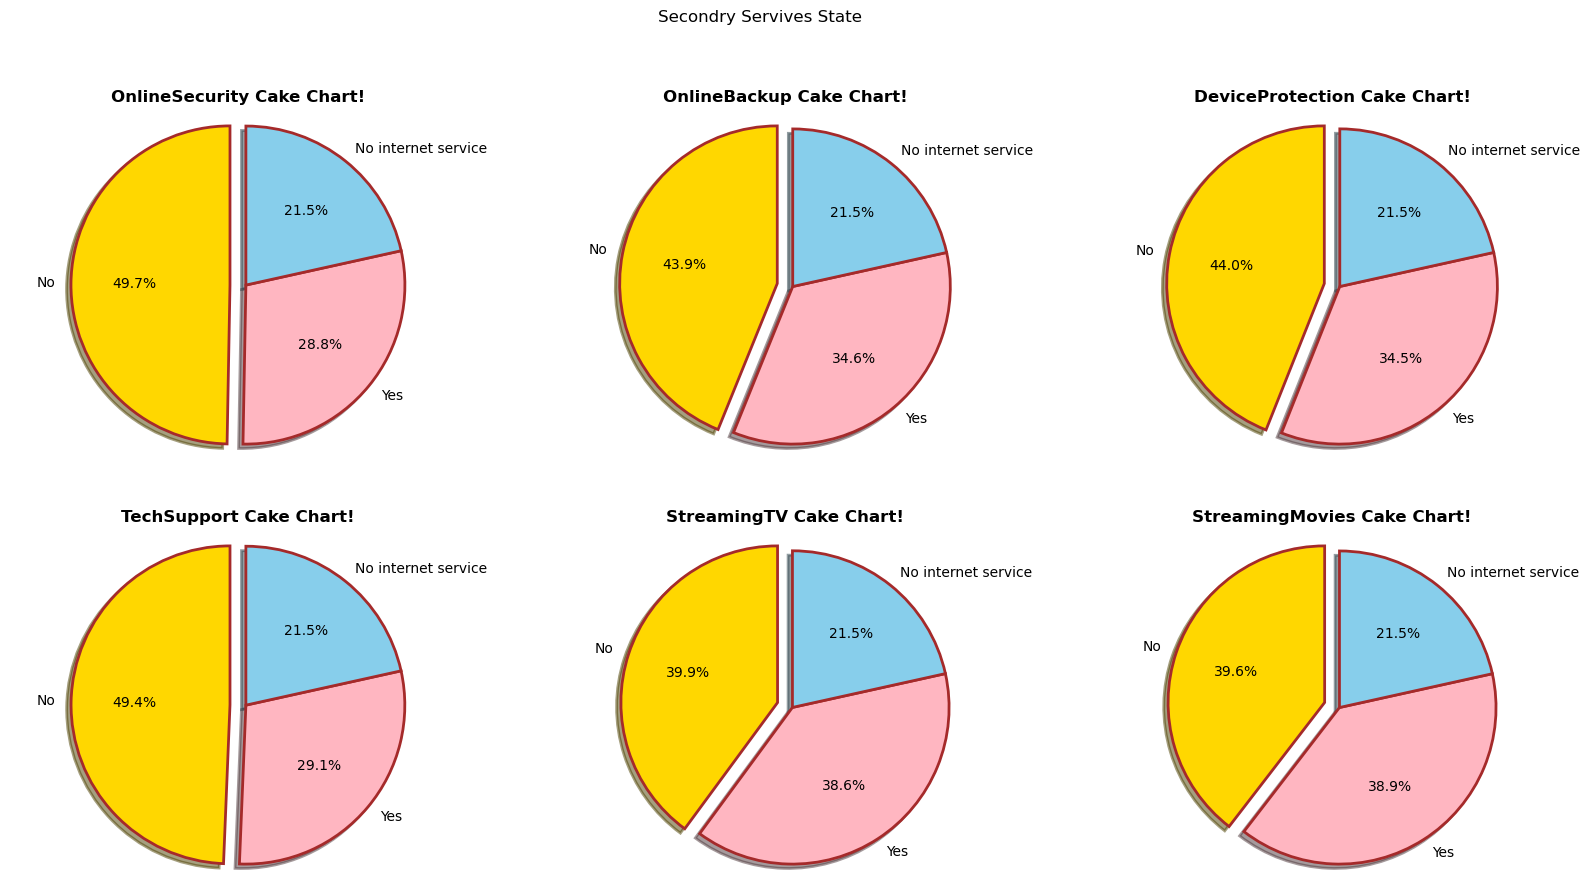

In [324]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.suptitle("Secondry Servives State")

# OnlineSecurity Plot
plt.subplot(2,3,1)
get_Pie(df,'OnlineSecurity')

# OnlineBackup Plot
plt.subplot(2,3,2)
get_Pie(df,'OnlineBackup')

# DeviceProtection Plot
plt.subplot(2,3,3)
get_Pie(df,'DeviceProtection')

# TechSupport Plot
plt.subplot(2,3,4)
get_Pie(df,'TechSupport')

# StreamingTV Plot
plt.subplot(2,3,5)
get_Pie(df,'StreamingTV')

# StreamingMovies Plot
plt.subplot(2,3,6)
get_Pie(df,'StreamingMovies')

plt.show()

**EDA for Payment Information**

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\977025912.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xlabel)


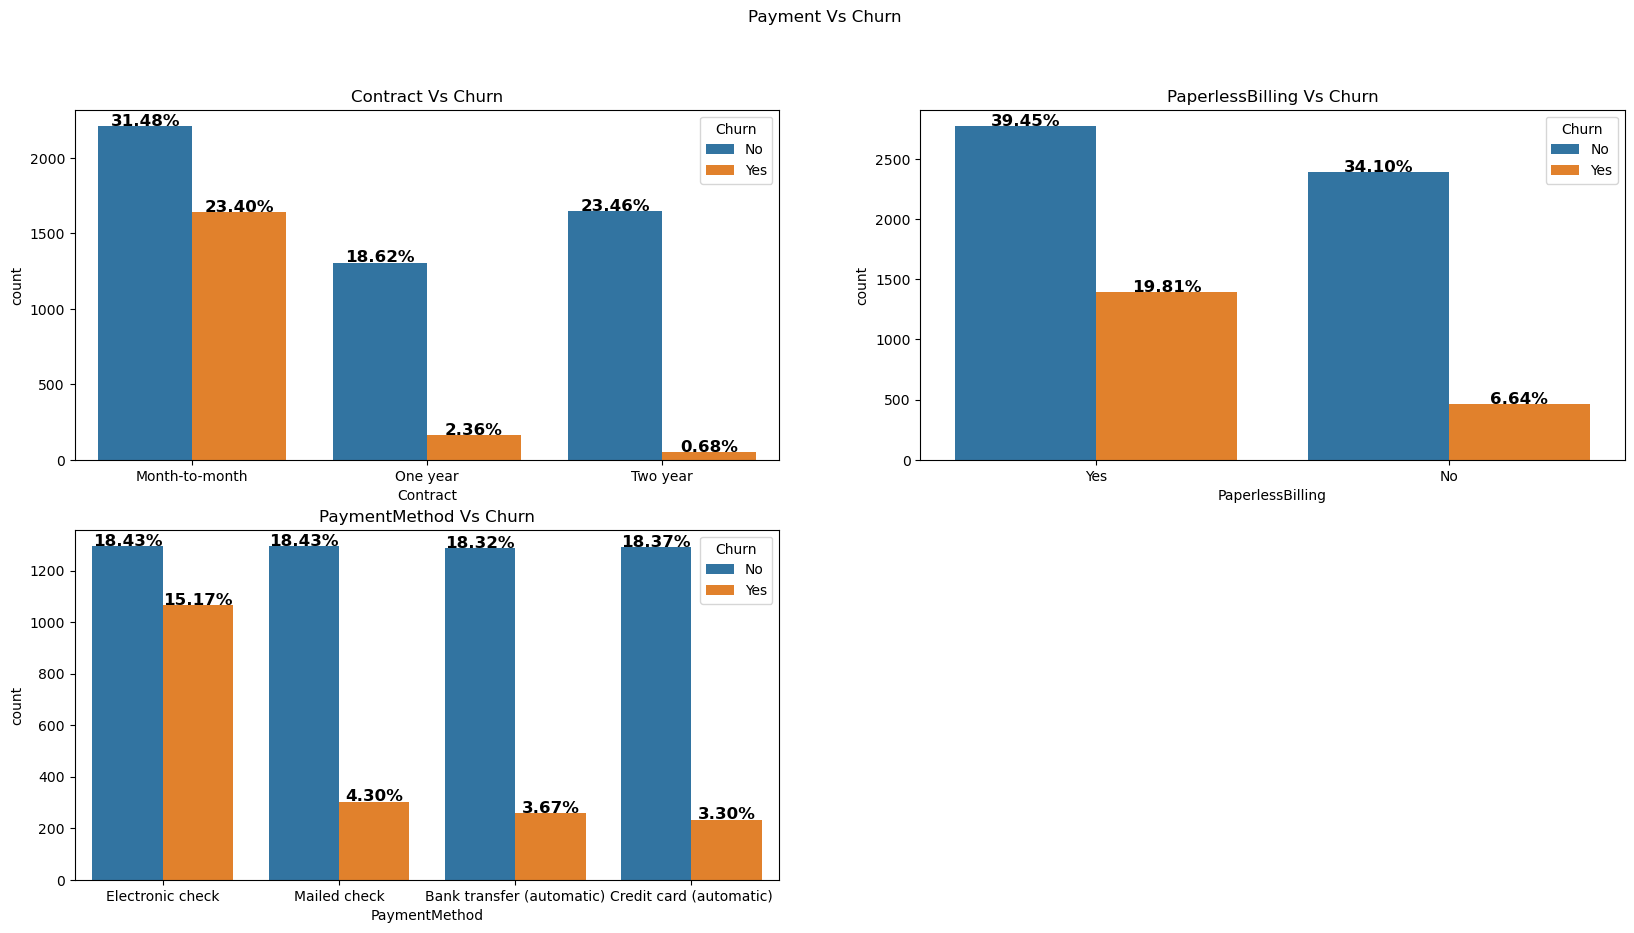

In [325]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.suptitle('Payment Vs Churn')

# Contact Plot.
countplot_ratio(data=df,x='Contract',hue='Churn')
plt.title('Contract Vs Churn')

# PaperlessBilling Plot.
plt.subplot(2,2,2)
countplot_ratio(data=df,x='PaperlessBilling',hue='Churn')
plt.title('PaperlessBilling Vs Churn')

# PaymentMethod Plot.
plt.subplot(2,2,3)
countplot_ratio(data=df,x='PaymentMethod',hue='Churn')
plt.title('PaymentMethod Vs Churn')

plt.show()


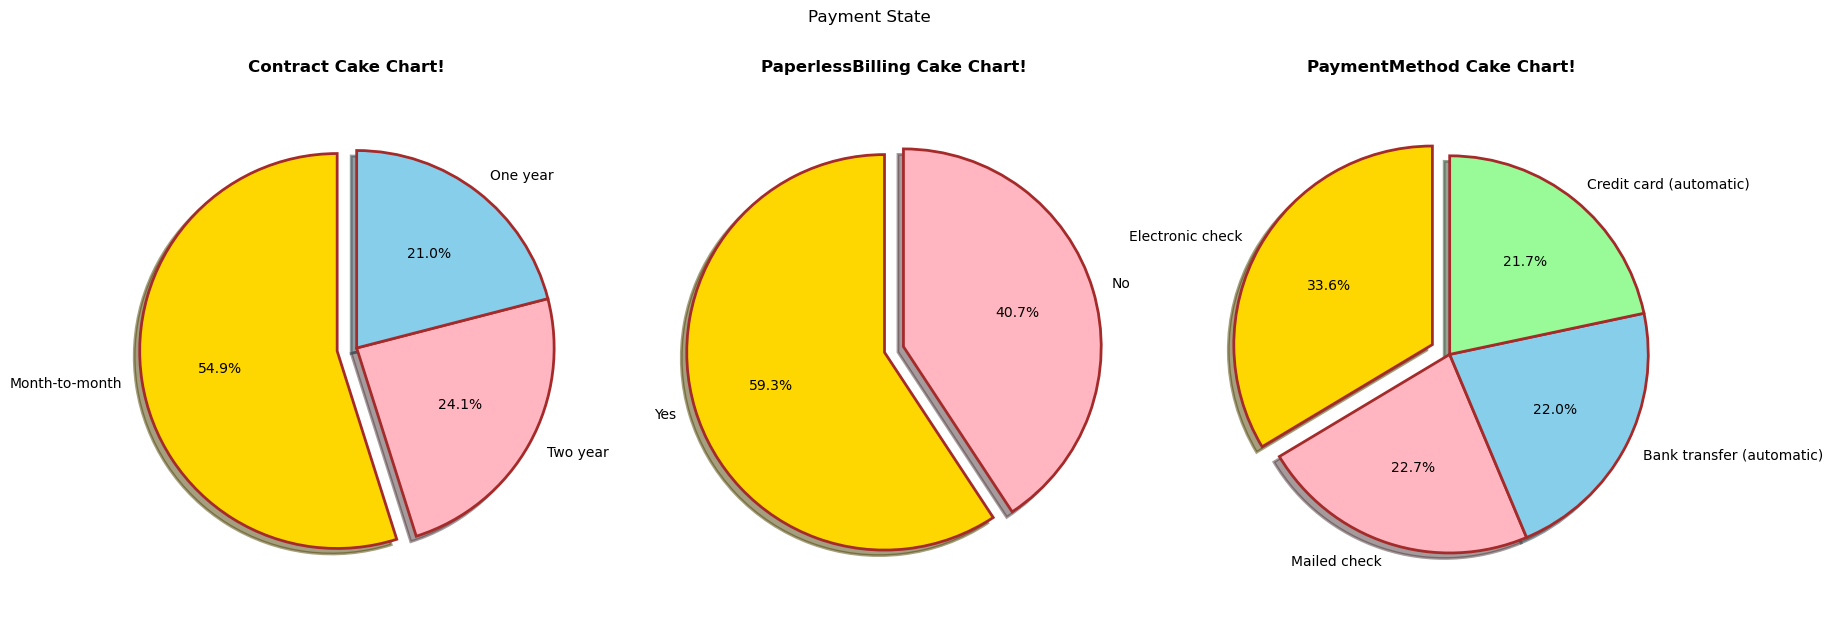

In [326]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.suptitle('Payment State')

# Contact Plot.
get_Pie(df,'Contract')

# PaperlessBilling Plot.
plt.subplot(1,3,2)
get_Pie(df,'PaperlessBilling')

# PaymentMethod Plot.
plt.subplot(1,3,3)
get_Pie(df,'PaymentMethod')

plt.show()

**EDA for Charges**

In [327]:
df1 = pd.DataFrame()
df1['Churn'] = ['Yes','No']
df1['MonthlyCharges'] = [(df[df['Churn'] == 'Yes']['MonthlyCharges']).agg('mean'),(df[df['Churn'] == 'No']['MonthlyCharges']).agg('mean')]
df1['TotalCharges'] = [(df[df['Churn'] == 'Yes']['TotalCharges']).agg('mean'),(df[df['Churn'] == 'No']['TotalCharges']).agg('mean')]
df1


,Churn,MonthlyCharges,TotalCharges
0,Yes,74.604308,1541.376548
1,No,61.344878,2559.674149


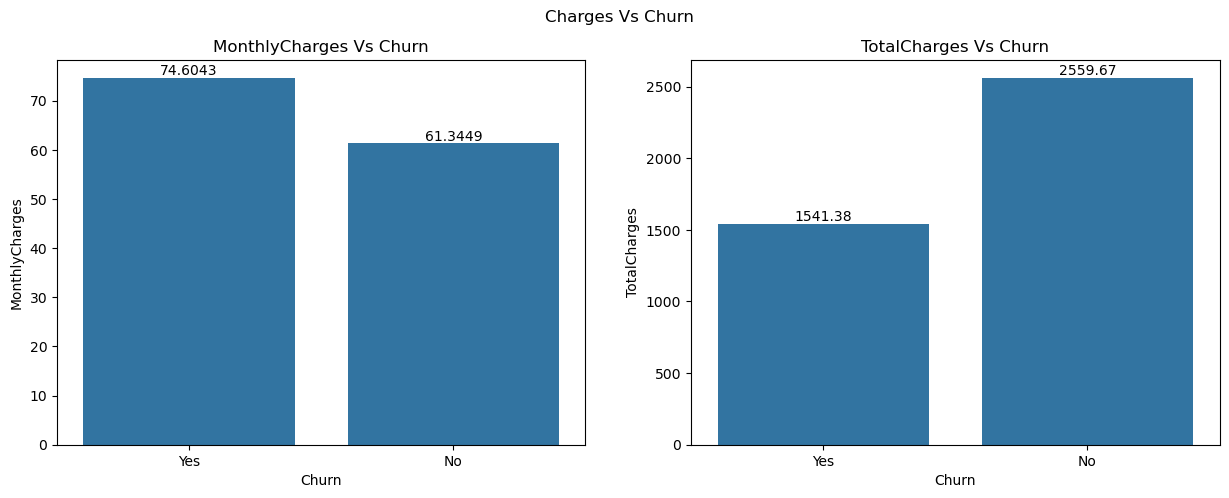

In [328]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle('Charges Vs Churn')

# MonthlyCharges Plot.
ax = sns.barplot(data=df1,x='Churn',y='MonthlyCharges')
plt.title('MonthlyCharges Vs Churn')
for i in ax.containers:
    ax.bar_label(i,)
# TotalCharges Plot.
plt.subplot(1,2,2)
ax = sns.barplot(data=df1,x='Churn',y='TotalCharges')
plt.title('TotalCharges Vs Churn')
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\4192747917.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'])
C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\4192747917.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])


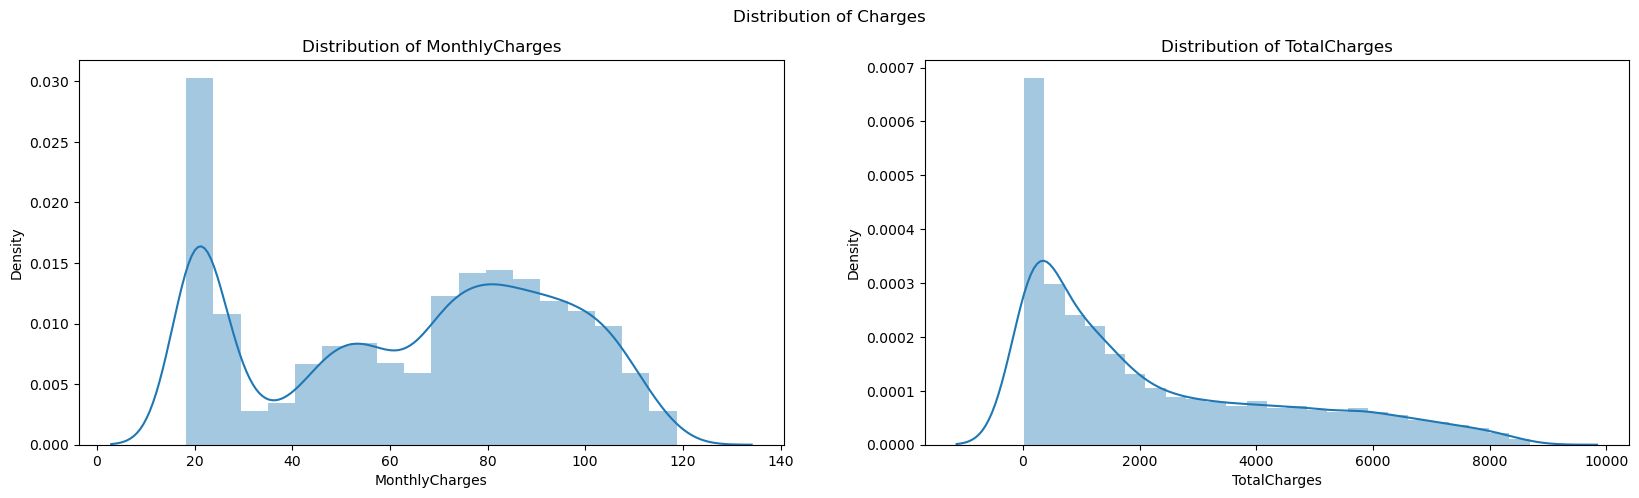

In [329]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.suptitle('Distribution of Charges')

#MonthlyCharges Distribution.
sns.distplot(df['MonthlyCharges'])
plt.title('Distribution of MonthlyCharges')

#TotalCharges Distribution.
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'])
plt.title('Distribution of TotalCharges')
plt.show()


C:\Users\Ismail Mohamed\AppData\Local\Temp\ipykernel_7548\2897021352.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])


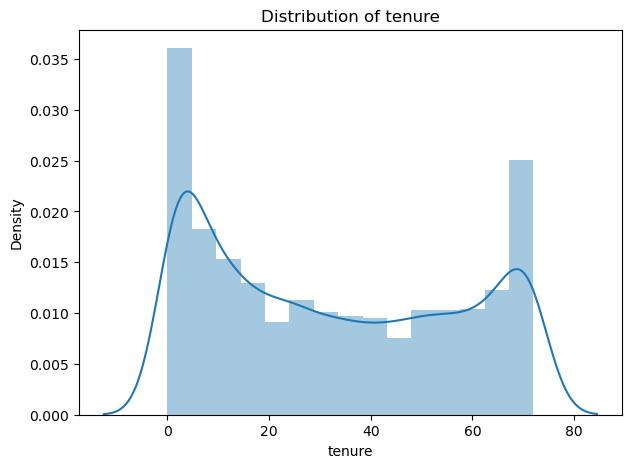

In [330]:
# Tenure Distribution.
plt.figure(figsize=(7,5))
sns.distplot(df['tenure'])
plt.title('Distribution of tenure')
plt.show()

**Futer Engineering**

In [331]:
l = {'Yes': 1,'No':0}
MultipleLines = {'No phone service': 0,'No':0,'Yes':1}
InternetService = {'No':0,'DSL':1,'Fiber optic':1}
OnlineSecurity = {'No internet service':0}
OnlineSecurity.update(l)

In [332]:
# Total Servives Used.
df['Total_Main_Servies'] = df['InternetService'].map(InternetService).astype(np.int64) + df['MultipleLines'].map(MultipleLines).astype(np.int64) + df['PhoneService'].map(l).astype(np.int64)

df['Total_Secondry_Servies'] = df['StreamingMovies'].map(OnlineSecurity).astype(np.int64) + df['StreamingTV'].map(OnlineSecurity).astype(np.int64) + df['TechSupport'].map(OnlineSecurity).astype(np.int64) + df['DeviceProtection'].map(OnlineSecurity).astype(np.int64) + df['OnlineBackup'].map(OnlineSecurity).astype(np.int64) + df['OnlineSecurity'].map(OnlineSecurity).astype(np.int64)

df['Total_Secondry_Servies']

0       1
1       2
2       2
3       3
4       0
       ..
7038    5
7039    4
7040    1
7041    0
7042    5
Name: Total_Secondry_Servies, Length: 7021, dtype: int64

**Check Outlier**

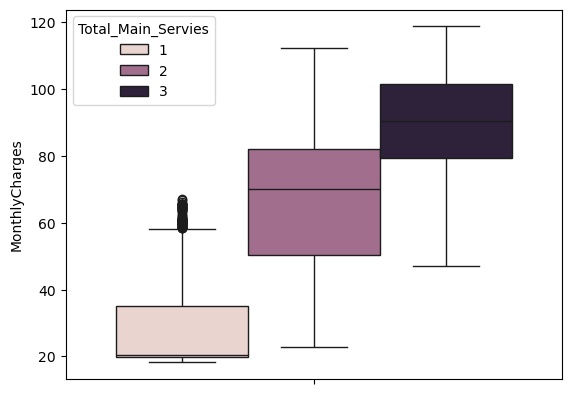

In [333]:
sns.boxplot(df,y='MonthlyCharges',hue='Total_Main_Servies')
plt.show()

In [334]:
Q1 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 1) & 
          ((df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)))]

df.shape

(6947, 22)

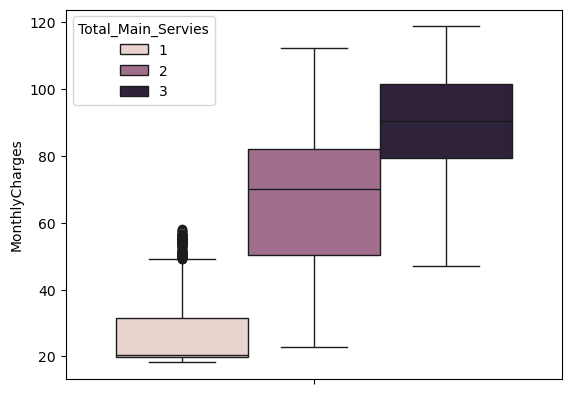

In [335]:
sns.boxplot(df,y='MonthlyCharges',hue='Total_Main_Servies')
plt.show()

In [336]:
Q1 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 1) & 
          ((df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)))]

df.shape

(6812, 22)

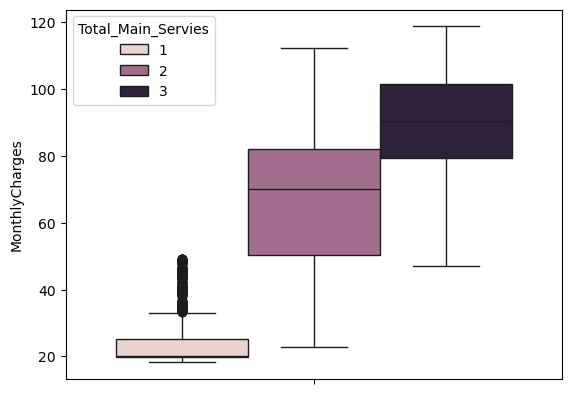

In [337]:
sns.boxplot(df,y='MonthlyCharges',hue='Total_Main_Servies')
plt.show()

In [338]:
Q1 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 1) & 
          ((df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)))]

df.shape

(6504, 22)

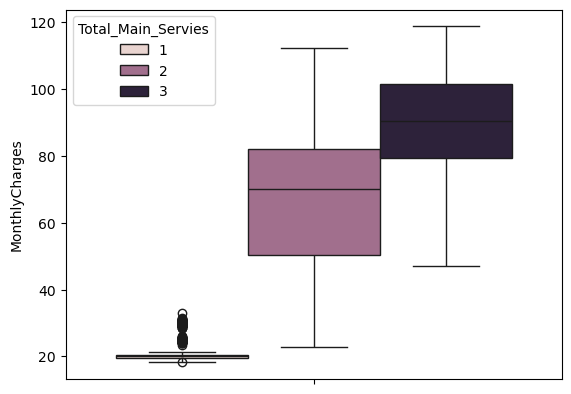

In [339]:
sns.boxplot(df,y='MonthlyCharges',hue='Total_Main_Servies')
plt.show()

In [340]:
Q1 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 1) & 
          ((df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)))]

df.shape

(6338, 22)

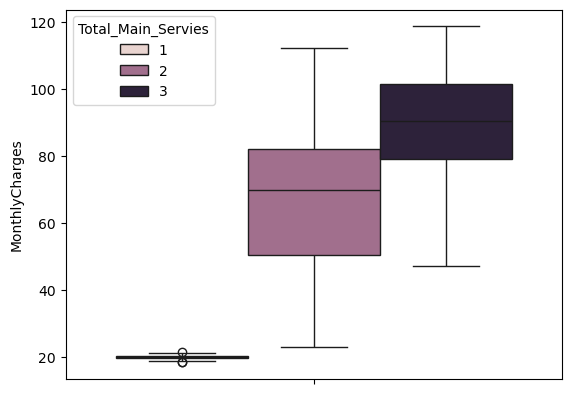

In [341]:
sns.boxplot(df,y='MonthlyCharges',hue='Total_Main_Servies')
plt.show()

In [342]:
Q1 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 1]['MonthlyCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 1) & 
          ((df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)))]

df.shape

(6335, 22)

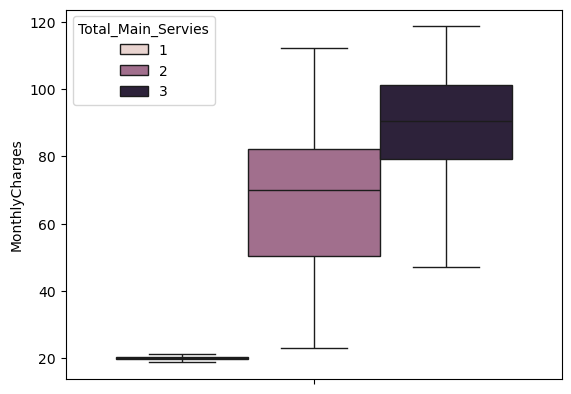

In [343]:
sns.boxplot(df,y='MonthlyCharges',hue='Total_Main_Servies')
plt.show()

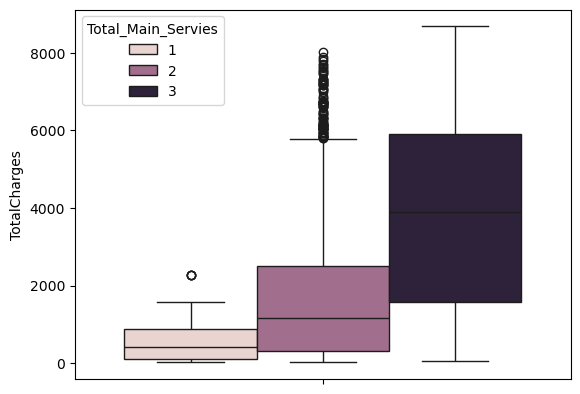

In [344]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

In [345]:
Q1 = df[df['Total_Main_Servies'] == 1]['TotalCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 1]['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 1) & 
          ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)))]

df.shape

(6331, 22)

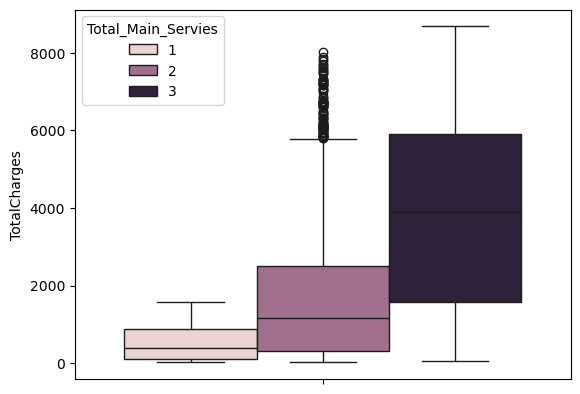

In [346]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

In [347]:
Q1 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 2) & 
          ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)))]

df.shape

(6234, 22)

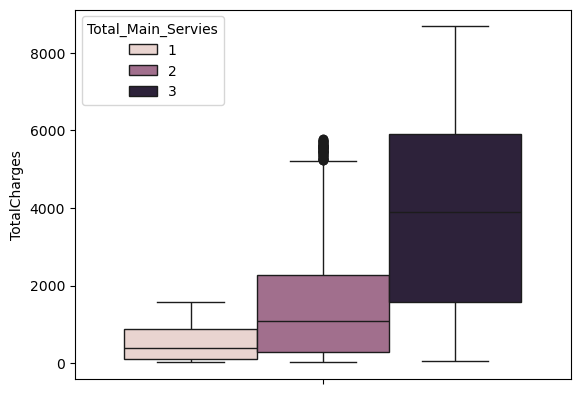

In [348]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

In [349]:
Q1 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 2) & 
          ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)))]

df.shape

(6173, 22)

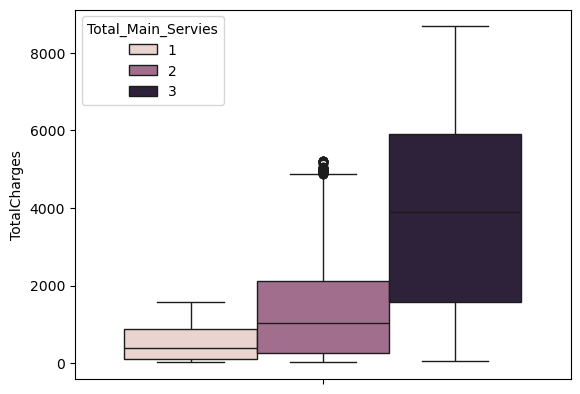

In [350]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

In [351]:
Q1 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 2) & 
          ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)))]

df.shape

(6129, 22)

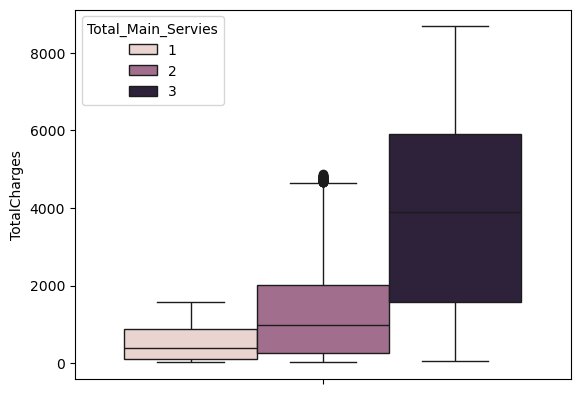

In [352]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

In [353]:
Q1 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 2) & 
          ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)))]

df.shape

(6100, 22)

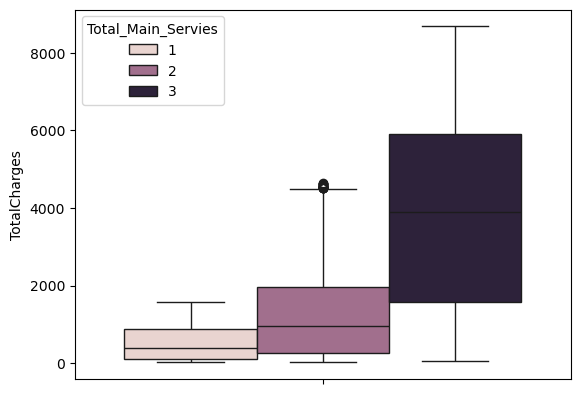

In [354]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

In [355]:
Q1 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 2) & 
          ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)))]

df.shape

(6081, 22)

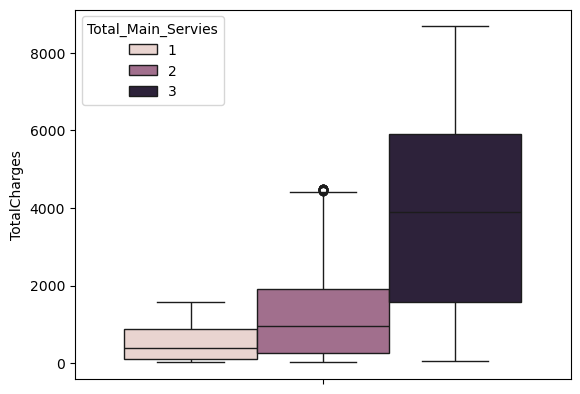

In [356]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

In [357]:
Q1 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 2) & 
          ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)))]

df.shape

(6070, 22)

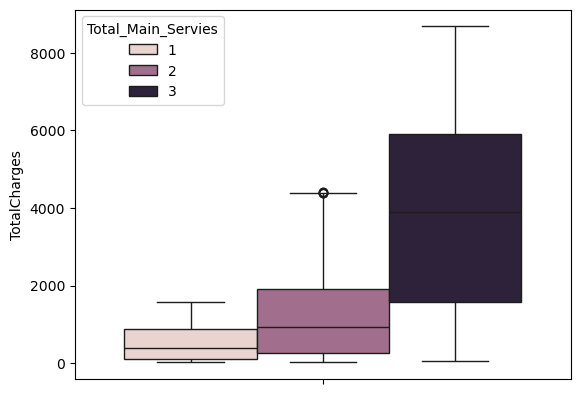

In [358]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

In [359]:
Q1 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 2) & 
          ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)))]

df.shape

(6065, 22)

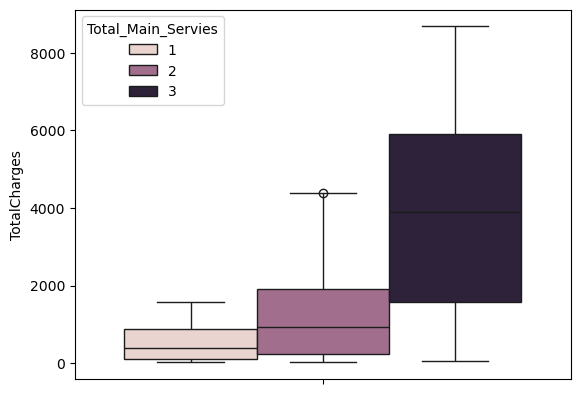

In [360]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

In [361]:
Q1 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.25)
Q3 = df[df['Total_Main_Servies'] == 2]['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Total_Main_Servies'] == 2) & 
          ((df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)))]

df.shape

(6064, 22)

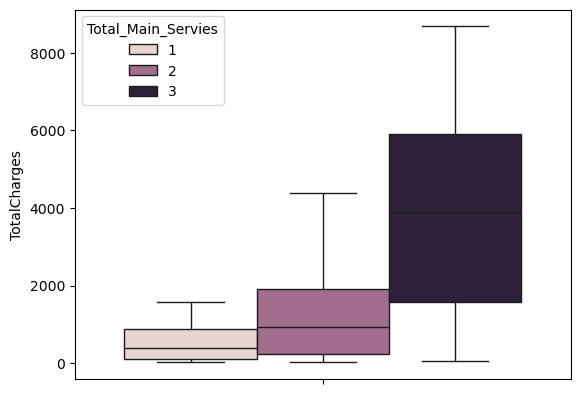

In [362]:
sns.boxplot(df,y='TotalCharges',hue='Total_Main_Servies')
plt.show()

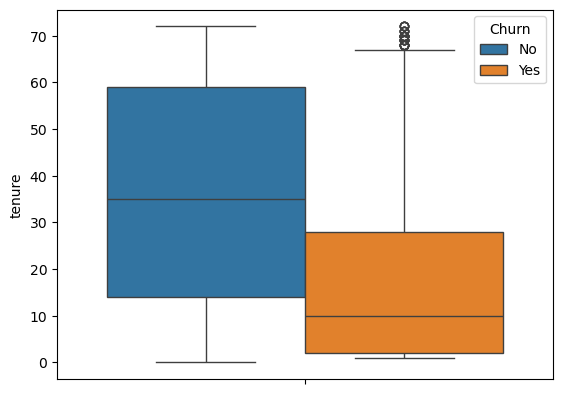

In [363]:
sns.boxplot(df,y='tenure',hue='Churn')
plt.show()

**Build Model**

In [364]:
# lists to summary evaluating model.
name = ['Logistic', 'Decision Tree', 'Naive Bayes using Gaussian', 'KNeighbors', 'Support Vector Machine',' Ensemble methods using Boosting','Ensemble methods using Bagging']
RUC = []
F1_Score = []
Accuracy = []

In [365]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

**Preprossing**

In [366]:
encoder = LabelEncoder()

for col in df.select_dtypes('O'):
    df[col] = (encoder.fit_transform(df[col])).astype(np.float64)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6064 entries, 1 to 7041
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  6064 non-null   float64
 1   SeniorCitizen           6064 non-null   float64
 2   Partner                 6064 non-null   float64
 3   Dependents              6064 non-null   float64
 4   tenure                  6064 non-null   int64  
 5   PhoneService            6064 non-null   float64
 6   MultipleLines           6064 non-null   float64
 7   InternetService         6064 non-null   float64
 8   OnlineSecurity          6064 non-null   float64
 9   OnlineBackup            6064 non-null   float64
 10  DeviceProtection        6064 non-null   float64
 11  TechSupport             6064 non-null   float64
 12  StreamingTV             6064 non-null   float64
 13  StreamingMovies         6064 non-null   float64
 14  Contract                6064 non-null   float

**Split Data**

In [368]:
X = df.drop(['Churn'],axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=35)

**Scaling Data**

In [369]:
from sklearn.preprocessing import StandardScaler

X_train_s = X_train
X_test_s = X_test
scaler = StandardScaler()

X_train_s[['TotalCharges','MonthlyCharges','tenure','Total_Secondry_Servies','Total_Main_Servies']] = scaler.fit_transform(X_train[['TotalCharges','MonthlyCharges','tenure','Total_Secondry_Servies','Total_Main_Servies']])
X_test_s[['TotalCharges','MonthlyCharges','tenure','Total_Secondry_Servies','Total_Main_Servies']] = scaler.transform(X_test[['TotalCharges','MonthlyCharges','tenure','Total_Secondry_Servies','Total_Main_Servies']])

**Logistic Model**

In [370]:
logreg = LogisticRegression(max_iter=10000)

# Train Model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [371]:
# Predect X_text
y_pred = logreg.predict(X_test)

In [372]:
# Evaluate Accuracy.
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
Accuracy.append(accuracy)

Accuracy: 0.79719703215169


In [373]:
# Evaluate useing Confusion Matrix & Classification Report:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
report = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

F1_Score.append(round(report['accuracy'],2))

Confusion Matrix:
[[783  92]
 [154 184]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       875
         1.0       0.67      0.54      0.60       338

    accuracy                           0.80      1213
   macro avg       0.75      0.72      0.73      1213
weighted avg       0.79      0.80      0.79      1213



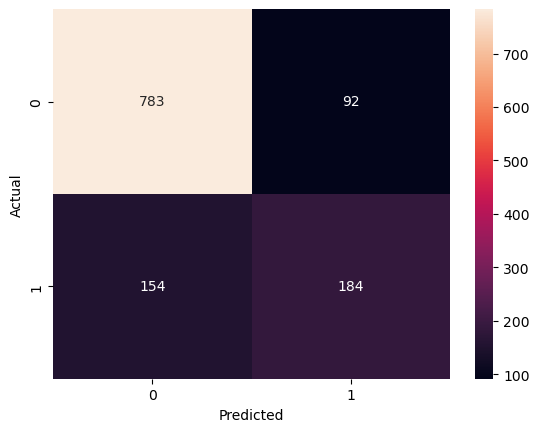

In [374]:
# vis. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

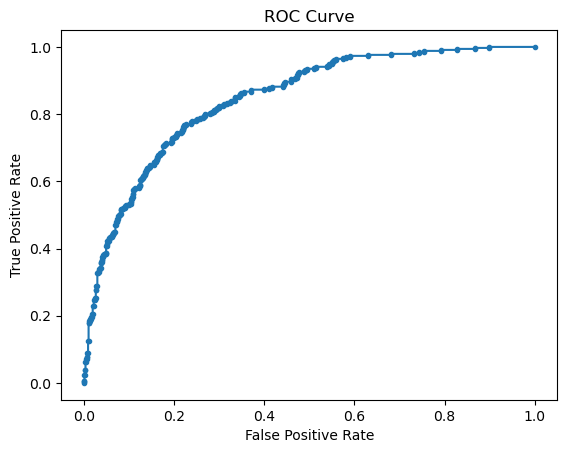

AUC Score: 0.85


In [375]:
# Evaluate using ROC
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")
RUC.append(auc_score)

**Decision Tree Model**

In [376]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
# Train Model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [377]:
# Predict X_test
y_pred = clf.predict(X_test)

In [378]:
# Evaluate using Accuracy Score.
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
Accuracy.append(accuracy)

Accuracy: 0.78


In [379]:
# Evaluate useing Confusion Matrix & Classification Report:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
report = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

F1_Score.append(round(report['accuracy'],2))

Confusion Matrix:
[[811  64]
 [200 138]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       875
         1.0       0.68      0.41      0.51       338

    accuracy                           0.78      1213
   macro avg       0.74      0.67      0.69      1213
weighted avg       0.77      0.78      0.76      1213



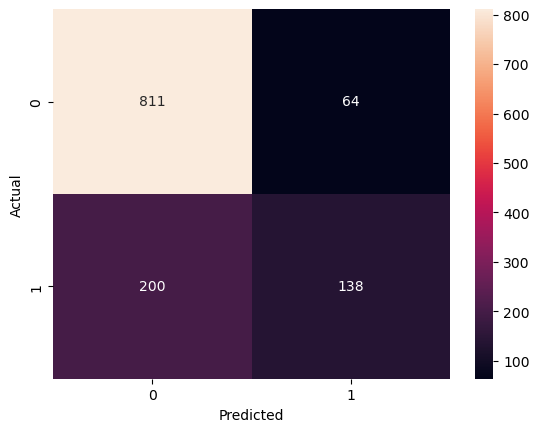

In [380]:
# vis. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

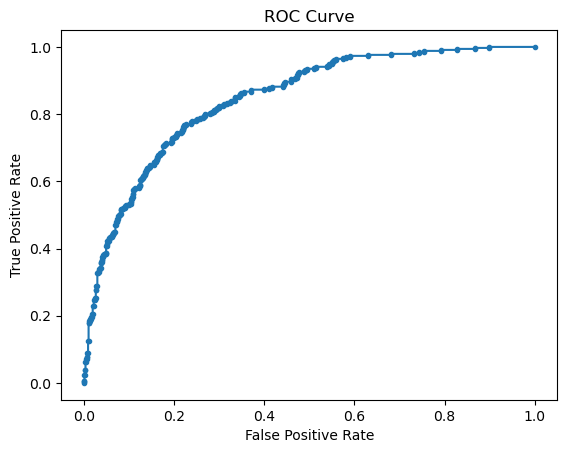

AUC Score: 0.85


In [381]:
# Evaluate using ROC
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")
RUC.append(auc_score)

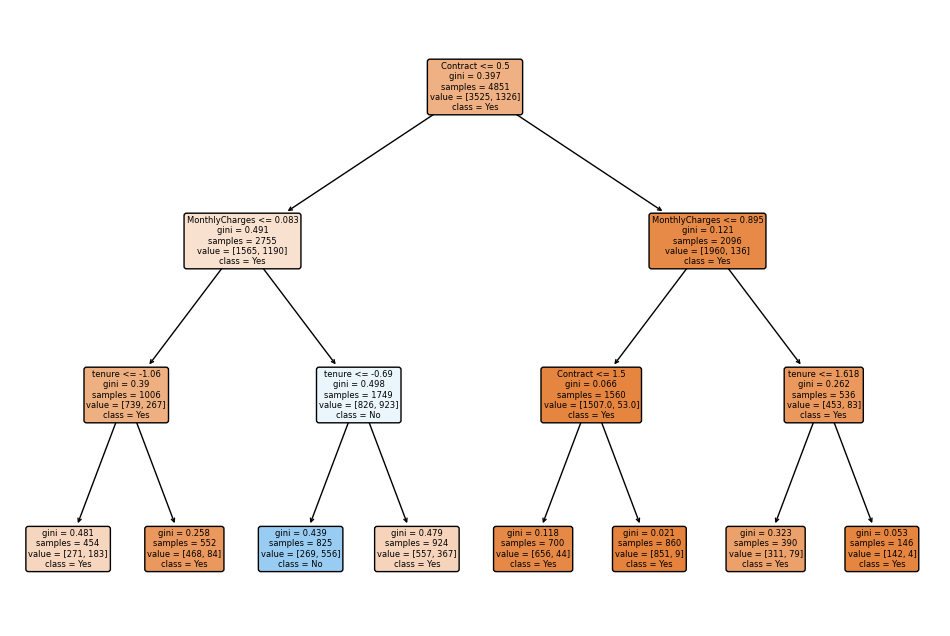

In [382]:
from sklearn.tree import plot_tree

# plotting Decision Tree of Model.
plt.figure(figsize=(12, 8))
plot_tree(
    clf, 
    filled=True, 
    feature_names=df.columns, 
    class_names=['Yes', 'No'],
    rounded=True
)
plt.show()

**Naive Bayes Model using Gaussian**

In [383]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()

# Train Model
gnb.fit(X_train, y_train)

GaussianNB()

In [384]:
## # Predict X_test
pregnb = gnb.predict(X_test)

In [385]:
# Evaluate using Accuracy Score.
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
Accuracy.append(accuracy)

Accuracy: 0.78


In [386]:
# Evaluate useing Confusion Matrix & Classification Report:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
report = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

F1_Score.append(round(report['accuracy'],2))

Confusion Matrix:
[[811  64]
 [200 138]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       875
         1.0       0.68      0.41      0.51       338

    accuracy                           0.78      1213
   macro avg       0.74      0.67      0.69      1213
weighted avg       0.77      0.78      0.76      1213



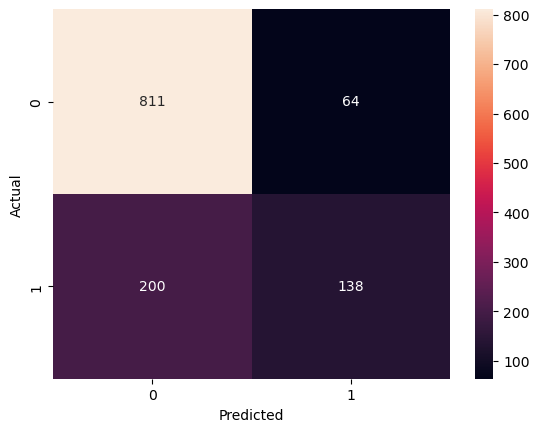

In [387]:
# vis. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

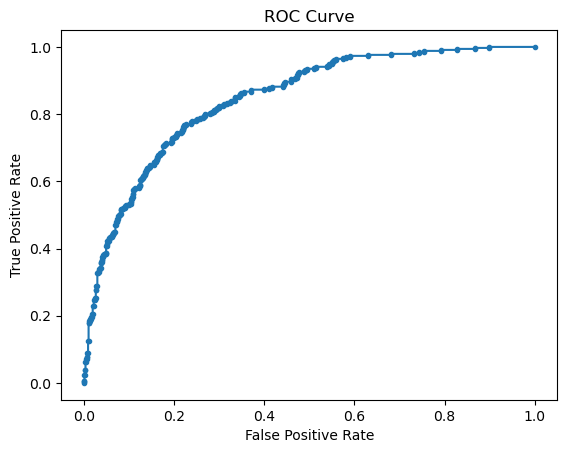

AUC Score: 0.85


In [388]:
# Evaluate using ROC
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")
RUC.append(auc_score)

**KNeighbors Model**

In [389]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# set Range of neighbors.
param_grid = {'n_neighbors': range(1, 4)}
knn = KNeighborsClassifier()

# Apply Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=4)

# Train Model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 4)})

In [390]:
# get bist neighbor in our range
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

Best value for k: 2


In [391]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
# Train Model
knn_best.fit(X_train, y_train)

# Predict X_test
y_pred = knn_best.predict(X_test)

In [392]:
# Evaluate using Accuracy Score.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={best_k}: {accuracy:.2f}")
Accuracy.append(accuracy)

Accuracy with k=2: 0.75


In [393]:
k_values = range(1, 10)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

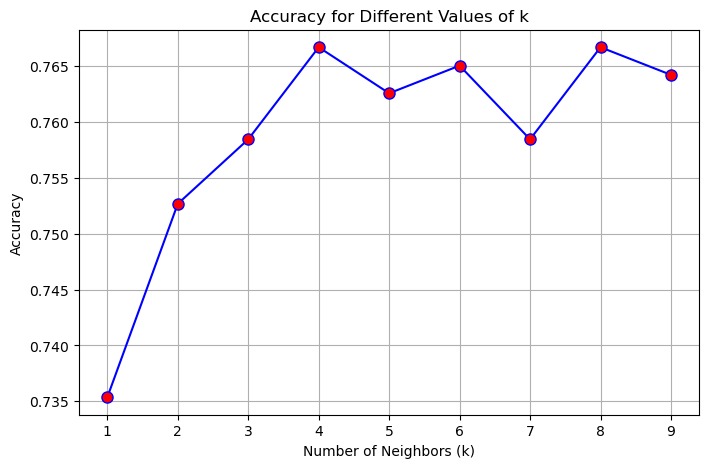

In [394]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', markerfacecolor='r', markersize=8)
plt.title('Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [395]:
# Evaluate useing Confusion Matrix & Classification Report:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
report = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

F1_Score.append(round(report['accuracy'],2))

Confusion Matrix:
[[756 119]
 [167 171]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       875
         1.0       0.59      0.51      0.54       338

    accuracy                           0.76      1213
   macro avg       0.70      0.68      0.69      1213
weighted avg       0.76      0.76      0.76      1213



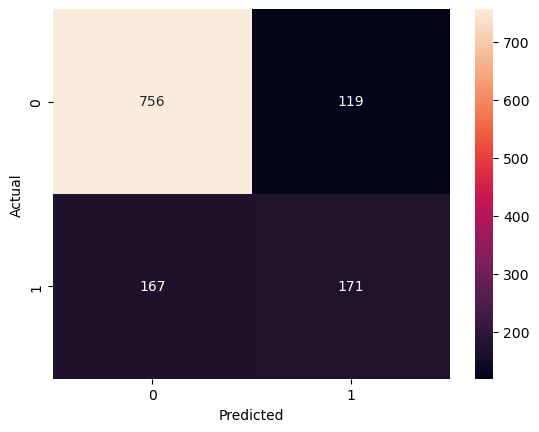

In [396]:
# vis. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

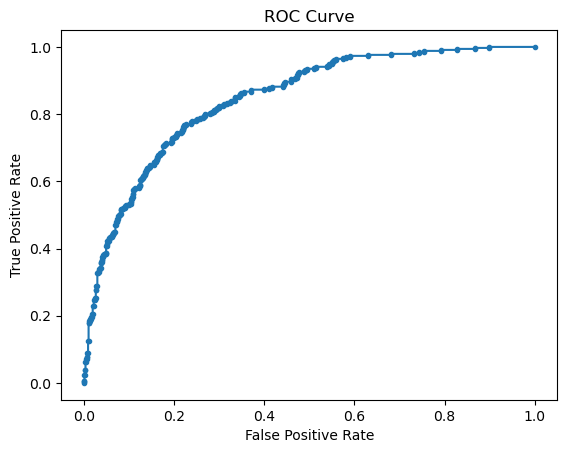

AUC Score: 0.85


In [397]:
# Evaluate using ROC
y_prob = logreg.predict_proba(X_test_s)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")
RUC.append(auc_score)

**Support Vector Machine Model**

In [398]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train Model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [399]:
# Predict X_test
y_pred = svm_model.predict(X_test)

# Evaluate using Accuracy Score.
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
Accuracy.append(accuracy)

Accuracy: 0.79


In [400]:
# Evaluate useing Confusion Matrix & Classification Report:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
report = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

F1_Score.append(round(report['accuracy'],2))

Confusion Matrix:
[[768 107]
 [150 188]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       875
         1.0       0.64      0.56      0.59       338

    accuracy                           0.79      1213
   macro avg       0.74      0.72      0.73      1213
weighted avg       0.78      0.79      0.78      1213



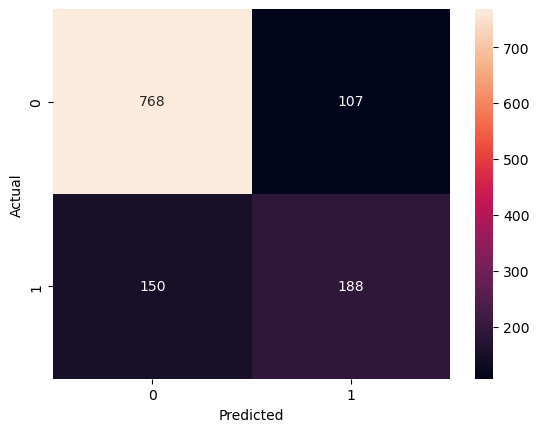

In [401]:
# vis. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

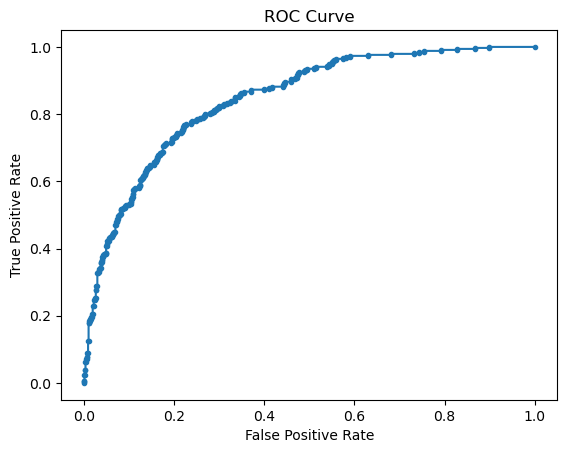

AUC Score: 0.85


In [402]:
# Evaluate using ROC
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")
RUC.append(auc_score)

**Ensemble methods using Bagging**

In [403]:
bagging_clf = BaggingClassifier(estimator=logreg, n_estimators=50, random_state=35)

In [404]:
# Train Model
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=10000), n_estimators=50,
                  random_state=35)

In [405]:
# Predict X_test.
y_pred = bagging_clf.predict(X_test)

In [406]:
# Evaluate using Accuracy Score.
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
Accuracy.append(accuracy)

Accuracy: 0.80


In [407]:
# Evaluate useing Confusion Matrix & Classification Report:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
report = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

F1_Score.append(round(report['accuracy'],2))

Confusion Matrix:
[[782  93]
 [154 184]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       875
         1.0       0.66      0.54      0.60       338

    accuracy                           0.80      1213
   macro avg       0.75      0.72      0.73      1213
weighted avg       0.79      0.80      0.79      1213



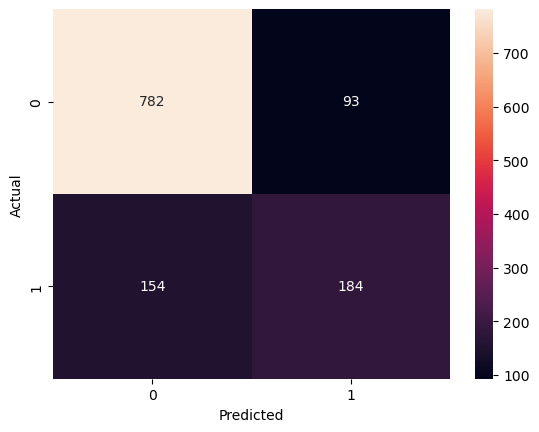

In [408]:
# vis. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

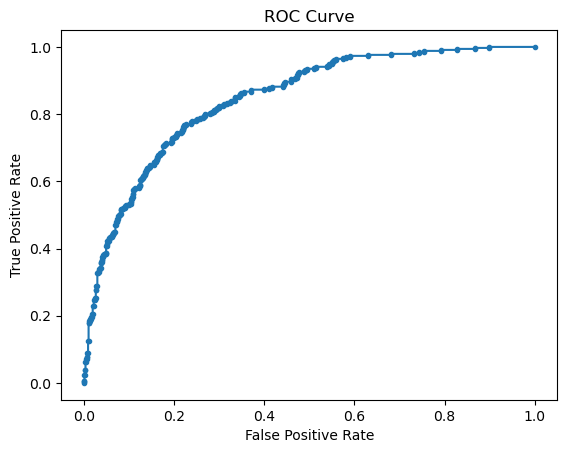

AUC Score: 0.85


In [409]:
# Evaluate using ROC
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")
RUC.append(auc_score)

**Ensemble methods using Boosting**

In [410]:
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Train model
ada_clf.fit(X_train, y_train)

# Predict X_test
y_pred_ada = ada_clf.predict(X_test)


e:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [411]:
# Evaluate using Accuracy Score.
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
Accuracy.append(accuracy)

Accuracy: 0.80


In [412]:
# Evaluate useing Confusion Matrix & Classification Report:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
report = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

F1_Score.append(round(report['accuracy'],2))

Confusion Matrix:
[[782  93]
 [154 184]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       875
         1.0       0.66      0.54      0.60       338

    accuracy                           0.80      1213
   macro avg       0.75      0.72      0.73      1213
weighted avg       0.79      0.80      0.79      1213



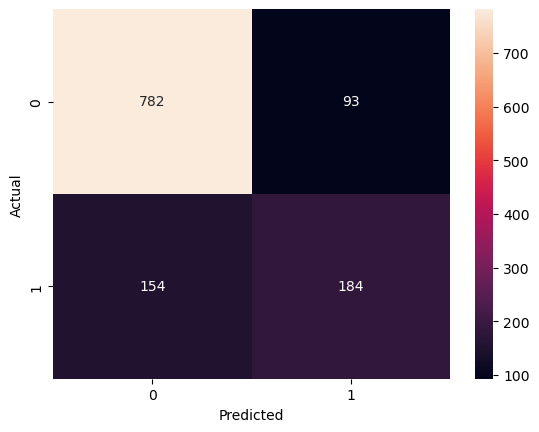

In [413]:
# vis. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

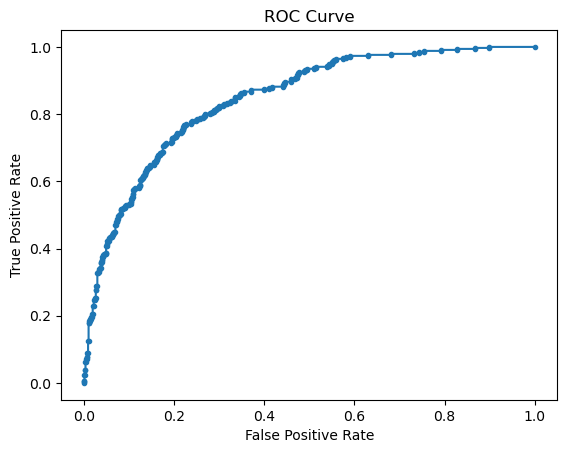

AUC Score: 0.85


In [414]:
# Evaluate using ROC
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")
RUC.append(auc_score)

In [415]:
# Summary Table for Evaluating model
Accuracy = [int(round(i,2)*100) for i in Accuracy]
RUC = [int(round(i,2)*100) for i in RUC]
F1_Score = [int(round(i,2)*100) for i in F1_Score]
Evaluating_Table = pd.DataFrame({'Model':name,'Accuracy':Accuracy,'AUC':RUC,'F1-Score':F1_Score})
Evaluating_Table

,Model,Accuracy,AUC,F1-Score
0,Logistic,80,85,80
1,Decision Tree,78,85,78
2,Naive Bayes using Gaussian,78,85,78
3,KNeighbors,75,85,76
4,Support Vector Machine,79,85,79
5,Ensemble methods using Boosting,80,85,80
6,Ensemble methods using Bagging,80,85,80


Best Model is Logistic